# Syria Tel Customer Churn Analysis.

### Student Name: Stephen Muuo Munyiala
### Pace: Remote
### Instructor: Faith Rotich.

## Introduction.

Customer churn is a major challenge for telecom companies like SyriaTel. When too many customers leave, it can mean big financial losses, higher marketing and acquisition costs, and a shrinking market share. To stay competitive, SyriaTel needs to understand why customers leave and what patterns lead to churn. By identifying these factors, they can take action to keep their customers happy and reduce revenue loss.

# Problem Statement.

This project is focused on developing predictive models to identify customers who are likely to stop using SyriaTel's services in the near future. By recognizing these at-risk customers early, SyriaTel can take proactive steps to address their concerns, improve their experience, and encourage them to stay. The goal is to reduce customer churn and strengthen customer loyalty, ultimately helping the company maintain a stable and satisfied customer base.

# Objectives.

This project aims to create a predictive model that can spot customers who might leave SyriaTel soon. With this insight, SyriaTel can take proactive steps to keep those customers and improve retention.

- Provide factors leading to customer churn
- Create models that predict churn
- Recommend how to reduce customer churn

In [273]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [274]:
#Loading the dataset.
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [275]:
#Check shape of dataset
df.shape

(3333, 21)

In [276]:
#checking Description of numerical features.
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Preparation.
This involved checking for duplicated values,missing values and removing an unnecessary column in the data

In [278]:
#Checking for duplicates
df.duplicated().sum()

0

In [279]:
#Checking for missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [280]:
#Dropping unnecessary column.
df.drop('phone number', axis=1, inplace=True)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploratory Data Analysis.


### Data Features.

In [281]:
#Differentiating the numerical and categorical features.
#Create numeric & categorical lists
numeric_cols = ['account length','number vmail messages','total day minutes','total day calls','total day charge',
                'total eve minutes','total eve calls','total eve charge','total night minutes','total night calls',
                'total night charge','total intl minutes','total intl calls','total intl charge','customer service calls']
categoric_cols = ['state','area code','international plan','voice mail plan']

## Churn Analysis using the Features.

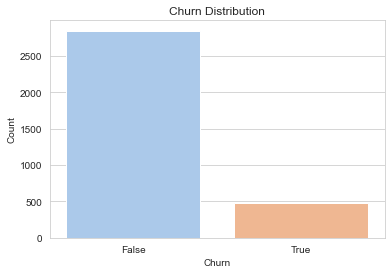

In [282]:
# Churn distribution
sns.set_style("whitegrid")

# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["churn"], palette="pastel")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

The churn distribution shows an imbalance, with significantly fewer customers churning than staying.483 out of 3333 have canceled their contract with SyriaTel. That means the company has lost 14.5% of its customers.

### Analyzing categorical features like international plan and voice mail plan in relation to churn.

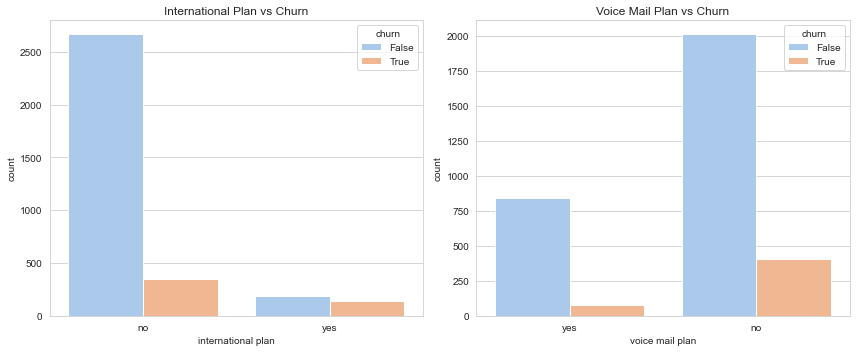

In [283]:
# Plot categorical features vs. churn
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# International Plan vs Churn
sns.countplot(x="international plan", hue="churn", data=df, palette="pastel", ax=axes[0])
axes[0].set_title("International Plan vs Churn")

# Voice Mail Plan vs Churn
sns.countplot(x="voice mail plan", hue="churn", data=df, palette="pastel", ax=axes[1])
axes[1].set_title("Voice Mail Plan vs Churn")

plt.tight_layout()
plt.show()


Having an international plan appears to be associated with a higher churn rate. This suggests that customers with international plans might be more likely to leave the service.

 Having a voice mail plan appears to be associated with a lower churn rate. This suggests that customers with voice mail plans might be more likely to remain with the service.
 
 

### Analysing numerical features in relation to churn

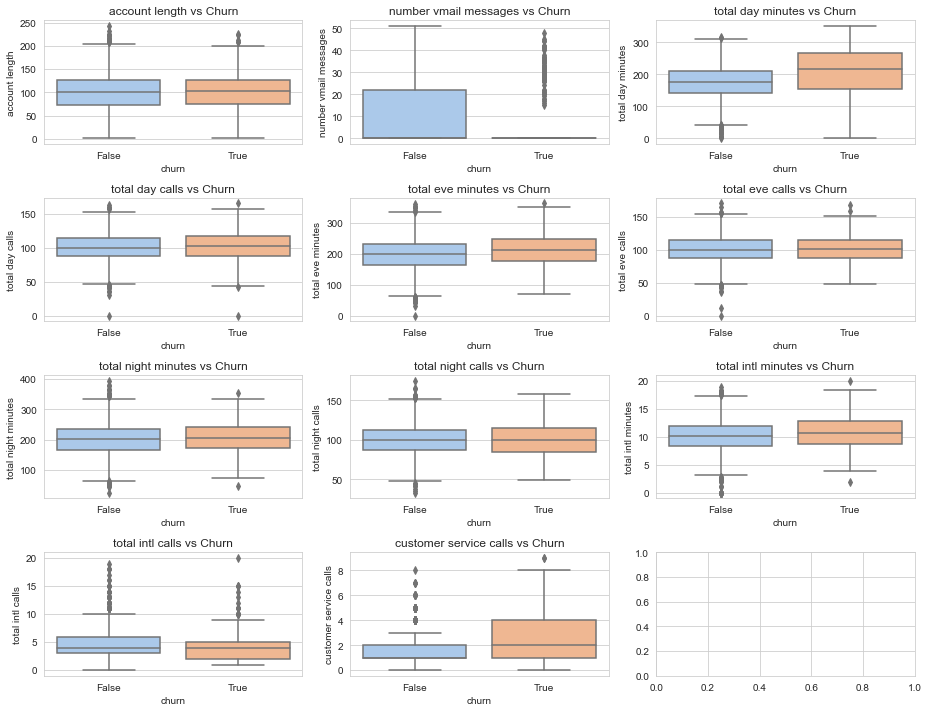

In [284]:
# Plot numerical feature distributions by churn
numerical_features = [
    "account length", "number vmail messages", "total day minutes", "total day calls",
    "total eve minutes", "total eve calls", "total night minutes", "total night calls",
    "total intl minutes", "total intl calls", "customer service calls"
]

fig, axes = plt.subplots(4, 3, figsize=(13, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x="churn", y=feature, data=df, palette="pastel", ax=axes[i])
    axes[i].set_title(f"{feature} vs Churn")

plt.tight_layout()
plt.show()

total day minutes, total intl minutes, and especially customer service calls appear to be strong predictors of churn. Higher values in these features are associated with a higher probability of churn.

total eve minutes and total night minutes show a moderate tendency for higher values to be associated with churn.

account length, total day calls, total eve calls, total night calls, and total intl calls have little to no impact on churn.

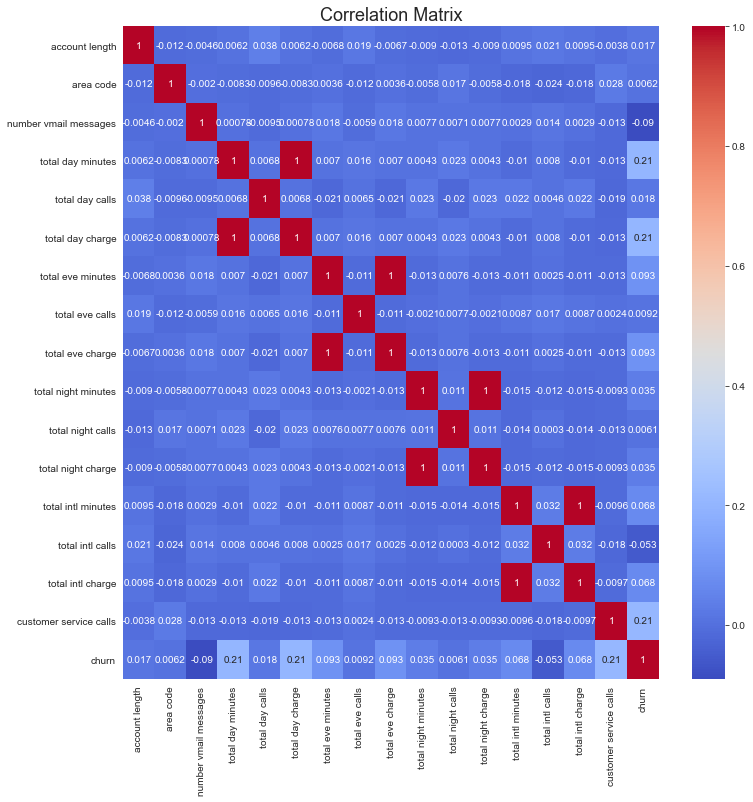

In [285]:
# Compute correlation matrix
#plot heatmap
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(12,12))   # Set the figure size to 12 inches by 12 inches
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlation Matrix', fontsize=18)
plt.show();

- total day minutes/charge and customer service calls are the strongest predictors of churn.
- evening, Night, International Minutes are the weakest predictors of churn.

## Data Preprocessing.


## Feature engineering

Feature engineering is the process of transforming raw data into meaningful features that can improve the performance of machine learning models. The goal is to enhance the model's ability to learn patterns and make accurate predictions. This involved the use of label encoding, one hot encoding and finally data scaling


In [286]:
#Perfoming label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [287]:
#Performing One Hot encoding.
df = pd.get_dummies(df,columns = ['state', 'area code','international plan','voice mail plan'])
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,1,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,1,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,1,0,1,0,1,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,1,0,0,0,1,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,1,0,0,1,1,0


In [288]:
#Performing data scaling.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))

for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.524793,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.595750,0.408451,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.438017,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.621840,0.492958,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.561983,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.374933,0.500000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.342975,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.467187,0.394366,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.305785,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.440290,0.619718,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


## Modeling.

During this phase, our goal is to develop a model capable of predicting customer churn based on the features present in our dataset. We will perform modeling via logistic regression, decision trees

## Logistic Regression.
Logistic regression is a fundamental algorithm used in machine learning and statistical modeling for binary classification tasks. It estimates the probability that a given input belongs to a specific class, usually represented as 0 or 1.

In [289]:
#Split Data into Features (X) and Target (y)
X = df.drop('churn', axis=1)  # Features (all columns except 'churn')
y = df['churn']               # Target variable

In [290]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [291]:
#Initialize and Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg_model = LogisticRegression(
    class_weight='balanced',  # Address class imbalance
    max_iter=1000,            # Ensure convergence
    random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [292]:
#Make Predictions on the Test Set
y_pred = model.predict(X_test)

In [293]:
#Evaluate Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.89

Confusion Matrix:
[[517  49]
 [ 22  79]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       566
         1.0       0.62      0.78      0.69       101

    accuracy                           0.89       667
   macro avg       0.79      0.85      0.81       667
weighted avg       0.91      0.89      0.90       667



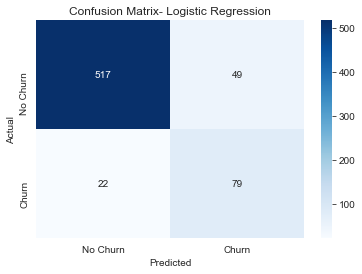

In [294]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix- Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual');

### Findings
The model achieves an overall accuracy of 89%, indicating correct predictions for 89% of the instances.

The model performs well for the majority class (0.0) but struggles with precision for the minority class (1.0). Addressing class imbalance and refining the decision-making process for class 1.0 could enhance overall robustness.

## Decision trees.



In [295]:
#Split Data into Features (X) and Target (y)
X = df.drop('churn', axis=1)  # Features
y = df['churn']               # Target variable

In [296]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [297]:
#Initialize and Train the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

# Initialize the model with hyperparameters to control overfitting
dt_model = DecisionTreeClassifier(
    max_depth=5,               # Limit tree depth
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=5,        # Minimum samples in a leaf node
    class_weight='balanced',   # Address class imbalance
    random_state=42
)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [298]:
#Make Predictions on the Test Set
y_pred = model.predict(X_test)

In [299]:
#Evaluate Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.89

Confusion Matrix:
[[517  49]
 [ 22  79]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       566
         1.0       0.62      0.78      0.69       101

    accuracy                           0.89       667
   macro avg       0.79      0.85      0.81       667
weighted avg       0.91      0.89      0.90       667



### Observations and recommendations.
-Decision trees provide interpretability and handle non-linear relationships well.

-Use hyperparameter tuning and ensemble methods to improve performance.

-Feature importance analysis helps identify key drivers of churn.

## Random Forest

In [300]:
#Split Data into Features (X) and Target (y)
X = df.drop('churn', axis=1)  # Features
y = df['churn']               # Target variable

In [301]:
#Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [302]:
#Initialize and Train the Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with hyperparameters to control overfitting
rf_model = RandomForestClassifier(
    n_estimators=100,         # Number of trees in the forest
    max_depth=5,              # Maximum depth of each tree
    min_samples_split=10,     # Minimum samples required to split a node
    class_weight='balanced',  # Address class imbalance
    random_state=42,
    n_jobs=-1                 # Use all CPU cores for parallel processing
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=10, n_jobs=-1, random_state=42)

In [303]:
#Make Predictions on the Test Set
y_pred = model.predict(X_test)

In [304]:
#Evaluate Model Performance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.89

Confusion Matrix:
[[517  49]
 [ 22  79]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.91      0.94       566
         1.0       0.62      0.78      0.69       101

    accuracy                           0.89       667
   macro avg       0.79      0.85      0.81       667
weighted avg       0.91      0.89      0.90       667



## Observations and recommendations.
-Random Forest improves generalization by aggregating predictions from multiple decision trees.

-Use feature importance analysis to prioritize actionable insights (e.g., reducing customer service calls).

-Tune hyperparameters and handle class imbalance for better minority class performance.

## Model Comparison using ROC Curve
The Receiver Operating Characteristic (ROC) curve is a fundamental tool for evaluating the performance of binary classification models.

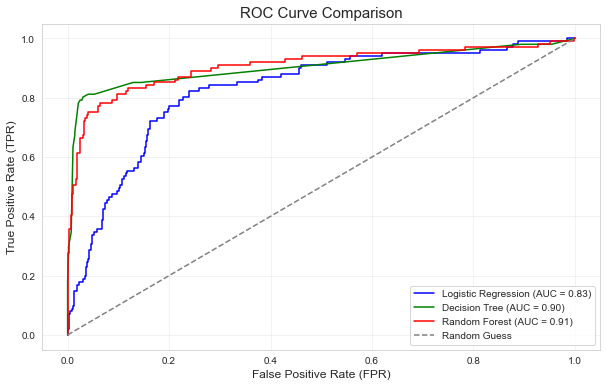

In [305]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Logistic Regression
y_pred_prob_lr = log_reg_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# Decision Tree
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Random Forest
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]


# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf)


plt.figure(figsize=(10, 6))

# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='green')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='red')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')

# Customize plot
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=15)
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

## Findings
Model Performance Summary (AUC Scores):
Random Forest: AUC = 0.91 (Best performance).

Decision Tree: AUC = 0.90 (Strong, slightly behind Random Forest).

Logistic Regression: AUC = 0.83 (Good, but weakest among the three).

Random Forest Model:Closest to the top-left corner.Highest True Positive Rate (TPR).Maintains a low False Positive Rate (FPR).

Higher AUC values indicate better performance. Random Forest model (AUC = 0.93) is the best model for this dataset.

Random Forest outperforms Logistic Regression and Decision Tree in most cases for imbalanced datasets.

## Feature importance.


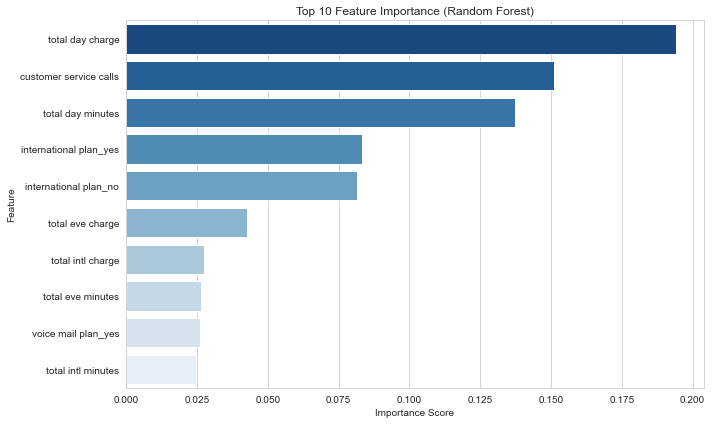

In [306]:
feature_importance = rf_model.feature_importances_

# Create DataFrame and sort by importance
importance_df = (
    pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    .sort_values(by='Importance', ascending=False)
    .head(10)  # Keep only top 10 features
)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette="Blues_r")
plt.title("Top 10 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()  # Improves spacing
plt.show()

## Findings.
-Total day charge and total day minutes are critical predictors, likely reflecting customer usage patterns.
-Customer service calls (second highest) strongly indicate dissatisfaction or potential churn.
-International plan status highlights the significance of international services in the model.

## Recommendations.
-Focus on customers with high daytime usage and frequent customer service interactions for churn prevention.
-Investigate international plan offerings and customer service processes to address pain points.
-
